In [1]:
import pandas as pd
import numpy as np
from datascience import *
# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore')
from datetime import datetime

/Users/shiftyblock/PycharmProjects/IEOR142/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Hour Forecasting

In [2]:
fire = pd.read_csv("all.csv")

In [3]:
myfire = fire[fire["On Scene DtTm"].notna()]

In [39]:
fire.head()

,Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,...,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,RowID,case_location,data_loaded_at
0,221210313,E36,22054955,Outside Fire,05/01/2022,04/30/2022,05/01/2022 02:58:25 AM,05/01/2022 02:59:15 AM,05/01/2022 02:59:25 AM,05/01/2022 03:01:06 AM,...,Fire,1,ENGINE,1.0,2,5,Hayes Valley,221210313-E36,POINT (-122.42316555403964 37.77781524520032),11/30/2023 09:35:04 AM
1,220190150,E29,22008871,Alarms,01/19/2022,01/18/2022,01/19/2022 01:42:12 AM,01/19/2022 01:44:13 AM,01/19/2022 01:44:28 AM,01/19/2022 01:46:47 AM,...,Alarm,1,ENGINE,1.0,3,10,Potrero Hill,220190150-E29,POINT (-122.39469970274361 37.76460987856451),11/30/2023 09:35:04 AM
2,230370131,T01,23017774,Alarms,02/06/2023,02/05/2023,02/06/2023 01:46:22 AM,02/06/2023 01:48:06 AM,02/06/2023 01:48:17 AM,02/06/2023 01:50:32 AM,...,Alarm,1,TRUCK,2.0,3,6,South of Market,230370131-T01,POINT (-122.40951834141595 37.78153743312193),11/30/2023 09:35:04 AM
3,232240121,E29,23107022,Vehicle Fire,08/12/2023,08/11/2023,08/12/2023 01:00:03 AM,08/12/2023 01:02:04 AM,08/12/2023 01:02:17 AM,08/12/2023 01:04:08 AM,...,Fire,1,ENGINE,1.0,2,6,South of Market,232240121-E29,POINT (-122.41161011668125 37.77376934550507),11/30/2023 09:35:04 AM
4,232240086,T11,23107014,Alarms,08/12/2023,08/11/2023,08/12/2023 12:39:50 AM,08/12/2023 12:41:18 AM,08/12/2023 12:41:58 AM,08/12/2023 12:44:07 AM,...,Alarm,1,TRUCK,3.0,6,8,Twin Peaks,232240086-T11,POINT (-122.44493522843229 37.748192598806035),11/30/2023 09:35:04 AM


In [41]:
mycopy = myfire.copy()
mycopy["Call Date"] = pd.to_datetime(mycopy["Call Date"])
mycopy = mycopy.sort_values(by = "Call Date")


In [42]:
mycopy["Date Hour"] = pd.to_datetime(mycopy["Received DtTm"], format = "%m/%d/%Y %I:%M:%S %p") 

In [43]:
#grouped = mycopy.groupby([pd.Grouper(key='Date Hour', freq='D'), pd.Grouper(key='Date Hour', freq='H')])
#result = grouped['Call Number'].count()  # For example, sum the 'value' column for each group

#result
mints = mycopy['Date Hour'].min()
all_dates = pd.date_range(pd.Timestamp(year= mints.year, month=mints.month, day=mints.day), mycopy['Date Hour'].max())
all_hours = range(24)
index = pd.MultiIndex.from_product([all_dates, all_hours], names=['date', 'hour'])



In [44]:
mycopy['hour'] = mycopy['Date Hour'].dt.hour
mycopy['date'] = mycopy['Date Hour'].dt.date
mycopy['combined'] = pd.to_datetime(mycopy['date'].astype(str) + ' ' + mycopy['hour'].astype(str) + ':00:00', format='%Y-%m-%d %H:%M:%S')
#result = mycopy.groupby("combined").size().reindex(index, fill_value=0)
#result = result.reset_index()
#result
result = mycopy.groupby("combined").size()
result = result.reindex(pd.date_range(result.index.min().floor('H'), result.index.max().ceil('H'), freq='H'), fill_value=0)
result = result.reset_index()
result = result.rename(columns = {0: "count"})

In [45]:
result.to_csv("import.csv")

In [46]:
timestamp_s = result["index"].map(pd.Timestamp.timestamp)
week = 24*60*60*7
year = (365.2425)* 24*60*60
day = 24 * 60 * 60
month = 24 * 60 * 60 * 30.5
result['daysin'] = np.sin(timestamp_s * (2 * np.pi / day))
result['daycos'] = np.cos(timestamp_s * (2 * np.pi / day))
result['wsin'] = np.sin(timestamp_s * (2 * np.pi / week))
result['wcos'] = np.cos(timestamp_s * (2 * np.pi / week))
result['msin'] = np.sin(timestamp_s * (2 * np.pi / month))
result['mcos'] = np.cos(timestamp_s * (2 * np.pi / month))
result['ysin'] = np.sin(timestamp_s * (2 * np.pi / year))
result['ycos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [47]:
result.head()

,index,count,daysin,daycos,wsin,wcos,msin,mcos,ysin,ycos
0,2000-04-12 21:00:00,26,-7.071068e-01,0.707107,-1.119645e-01,0.993712,-0.679273,-0.733885,0.981201,-0.192990
1,2000-04-12 22:00:00,11,-5.000000e-01,0.866025,-7.473009e-02,0.997204,-0.685548,-0.728028,0.981062,-0.193693
2,2000-04-12 23:00:00,11,-2.588190e-01,0.965926,-3.739119e-02,0.999301,-0.691771,-0.722117,0.980923,-0.194396
3,2000-04-13 00:00:00,9,7.301081e-13,1.000000,-4.154101e-13,1.000000,-0.697944,-0.716152,0.980783,-0.195100
4,2000-04-13 01:00:00,12,2.588190e-01,0.965926,3.739119e-02,0.999301,-0.704066,-0.710135,0.980643,-0.195803


In [48]:
#add Holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays()
result['holiday'] = result['index'].isin(holidays)

In [49]:
def plot_entire_series(x, y, **kwargs):
    
    plt.figure(figsize=(120, 25))
    plt.plot(x, y, linewidth=3, color='black')
    
    for key, value in kwargs.items():
        plt.plot(x, value, linewidth=3, color=key)
        
    plt.xlabel('Call Date', fontsize=16)
    plt.ylabel('Call Number', fontsize=16)
    plt.show()
    
    return None

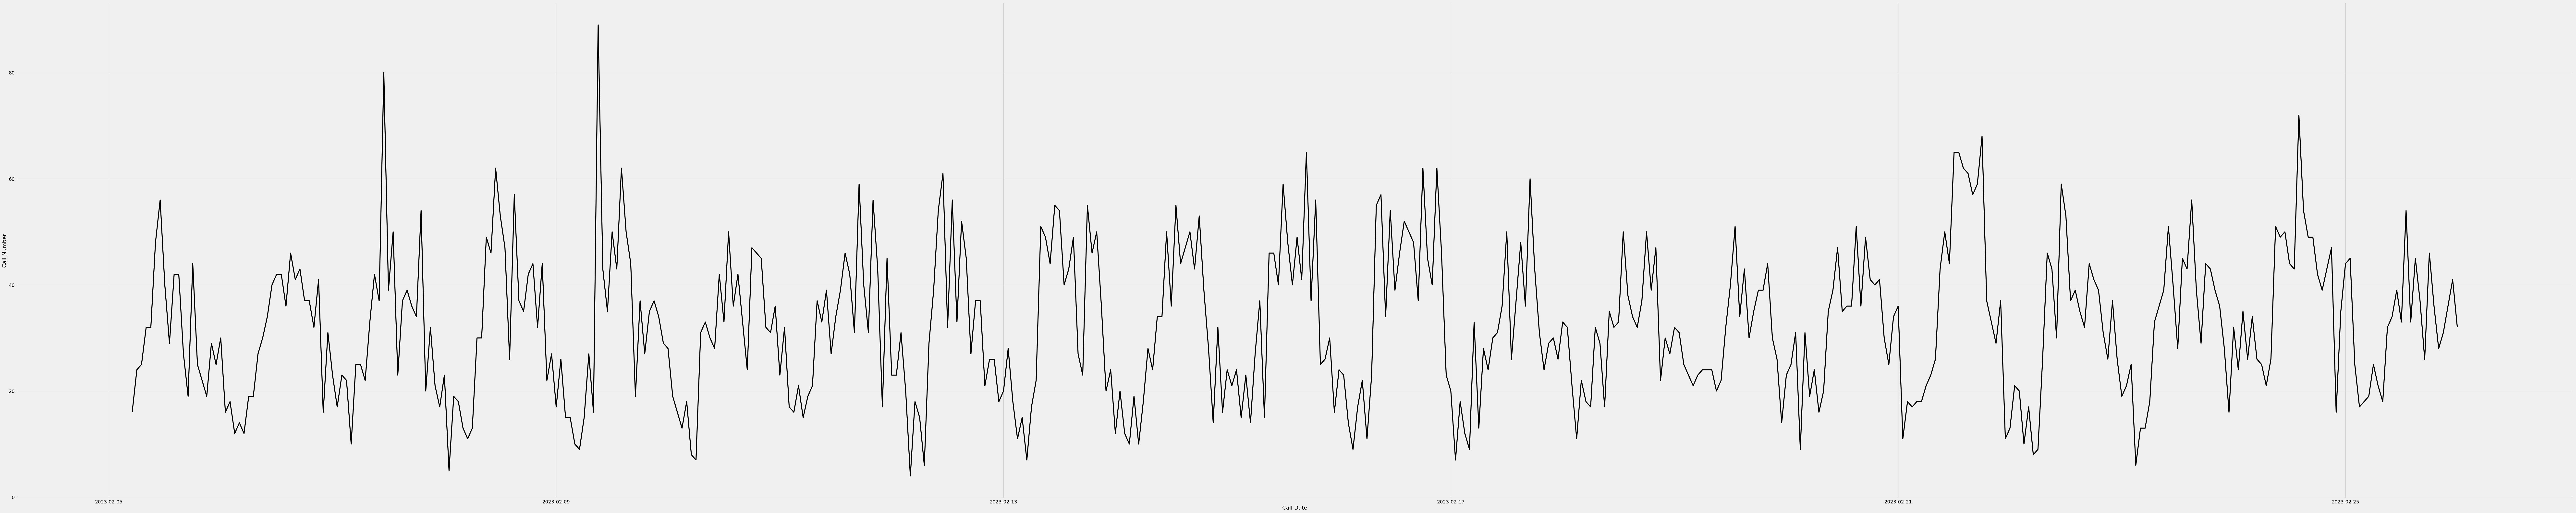

In [50]:
x = result["index"].to_numpy()[200000:200500]
y = result["count"].to_numpy()[200000:200500]

plot_entire_series(x, y)

In [51]:
import statsmodels.formula.api as smf
train, test = result.iloc[30000:40000], result.iloc[40000:50000]
time_period = list(range(len(train)))
train_lm = train.copy()
train_lm['TimePeriod'] = time_period
train_lm.tail()
lm = smf.ols(formula='count ~ TimePeriod', data=train_lm).fit()
x = train['index'].to_numpy()
y = train['count'].to_numpy()
y_pred = lm.predict(train_lm).to_numpy()

#plot_entire_series(x, y, red=y_pred)

In [52]:
207294/5 * 4
result.head()

,index,count,daysin,daycos,wsin,wcos,msin,mcos,ysin,ycos,holiday
0,2000-04-12 21:00:00,26,-7.071068e-01,0.707107,-1.119645e-01,0.993712,-0.679273,-0.733885,0.981201,-0.192990,False
1,2000-04-12 22:00:00,11,-5.000000e-01,0.866025,-7.473009e-02,0.997204,-0.685548,-0.728028,0.981062,-0.193693,False
2,2000-04-12 23:00:00,11,-2.588190e-01,0.965926,-3.739119e-02,0.999301,-0.691771,-0.722117,0.980923,-0.194396,False
3,2000-04-13 00:00:00,9,7.301081e-13,1.000000,-4.154101e-13,1.000000,-0.697944,-0.716152,0.980783,-0.195100,False
4,2000-04-13 01:00:00,12,2.588190e-01,0.965926,3.739119e-02,0.999301,-0.704066,-0.710135,0.980643,-0.195803,False


In [65]:
ar = result.copy()
ar["rolldmean"] = ar['count'].rolling(window=24, closed = "left").mean()
ar["rollddmean"] = ar['count'].rolling(window=2*24, closed = "left").mean()
ar["rollmmean"] = ar['count'].rolling(window=30*24, closed = "left").mean()
ar["lh"] = ar["count"].shift(1)
ar["llh"] = ar["count"].shift(2)
ar["lllh"] = ar["count"].shift(3) 
ar["llllh"] = ar["count"].shift(4) 
ar["lllllh"] = ar["count"].shift(5) 
ar['yesterday'] = ar['count'].shift(24)
ar['yesteryesterday'] = ar['count'].shift(2*24)
ar['lweek'] = ar['count'].shift(7*24)
ar['lmonth'] = ar['count'].shift(30*24)
ar['lyear'] = ar['count'].shift(365*24)
train_ar, test_ar = ar.iloc[0:165835], ar.iloc[165835:]
ar1 = smf.ols(formula='count ~  daysin+ daycos + wsin+wcos +  mcos+ ycos+ lh + llh + lllh + llllh + lllllh+ rolldmean + rollddmean + yesterday + yesteryesterday + lweek + lmonth + lyear', data=train_ar).fit()
#ar1 = smf.ols(formula='count ~ lh + llh + lllh', data=train_ar).fit()

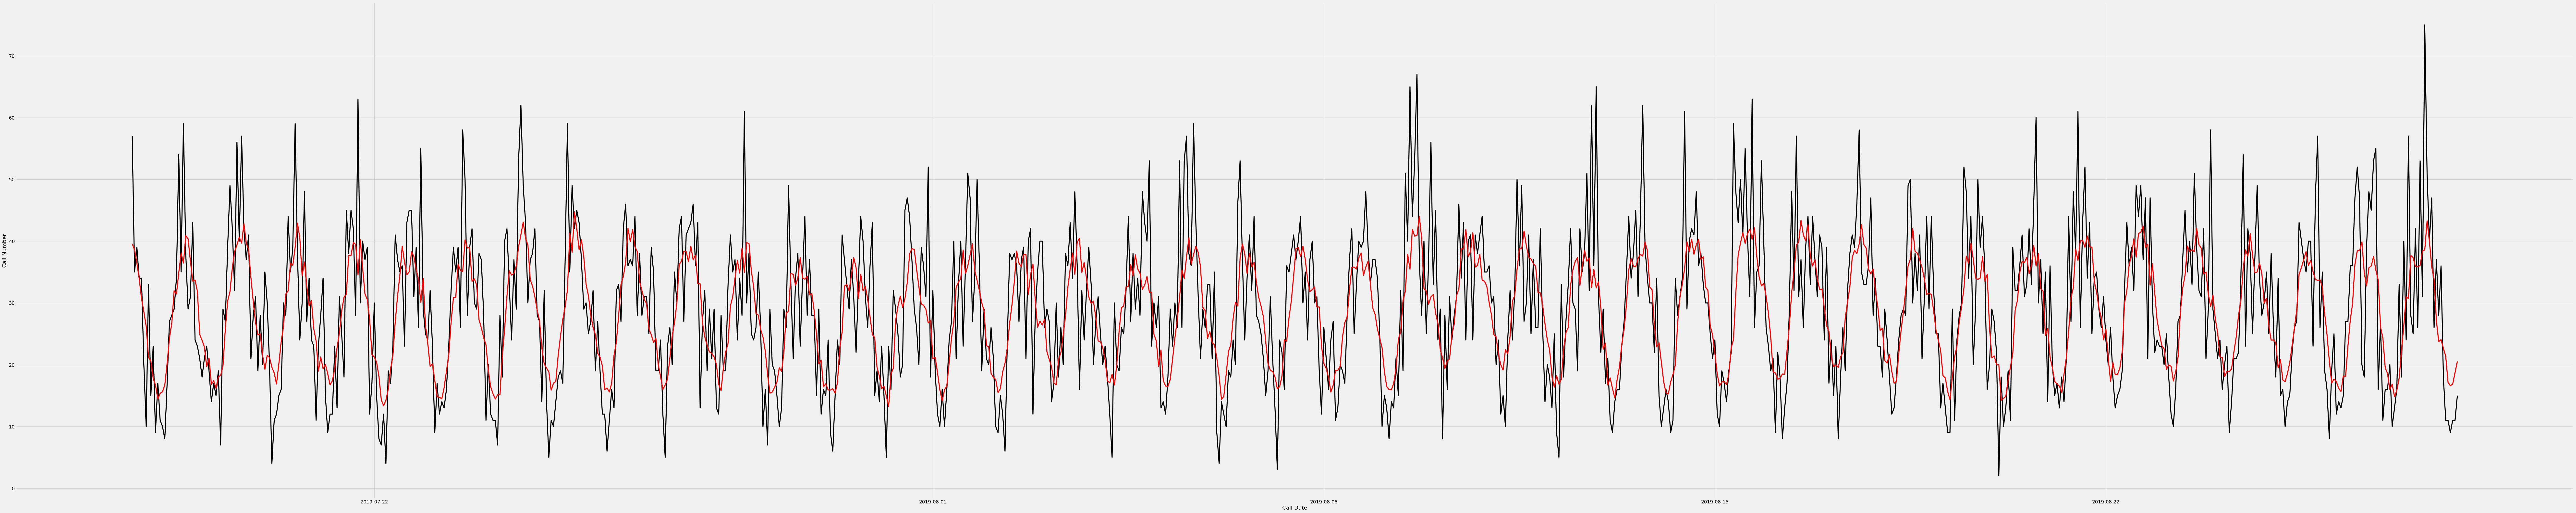

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     7141.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:37:18   Log-Likelihood:            -5.5718e+05
No. Observations:              157075   AIC:                         1.114e+06
Df Residuals:                  157055   BIC:                         1.115e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4908      0.128     11.639      0.000       1.240       1.742
holiday[T.True]     2.9601      0.628      4.715      0.000       1.730       4.191
daysin             -2.9959      0.064    -47.115      0.000      -3.121      -2.871
daycos             -3.6805      0.043    -84.873      0.000      -3.766      -3.596
wsin                0.3557      0.030     11.716      0.000       0.296       0.415
wcos                0.2166      0.030      7.171      0.000       0.157       0.276
mcos                0.0589      0.030      1.964      0.050       0.000       0.118
ycos                0.0271      0.030      0.904      0.366      -0.032       0.086
lh                  0.1289      0.003     50.274      0.000       0.124       0.134
llh                 0.0767      0.003     29.784      0.000       0.072       0.082
lllh                0.0392      0.003     15.201      0.000       0.034       0.044
llllh               0.0112      0.003      4.355      0.000       0.006       0.016
lllllh             -0.0065      0.003     -2.523      0.012      -0.012      -0.001
rolldmean           0.0237      0.016      1.486      0.137      -0.008       0.055
rollddmean          0.3782      0.017     22.781      0.000       0.346       0.411
yesterday           0.0634      0.003     24.648      0.000       0.058       0.068
yesteryesterday     0.0313      0.003     12.237      0.000       0.026       0.036
lweek               0.0912      0.002     37.355      0.000       0.086       0.096
lmonth              0.0341      0.002     14.090      0.000       0.029       0.039
lyear               0.0655      0.002     26.738      0.000       0.061       0.070
==============================================================================
Omnibus:                    21608.662   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53642.059
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                       5.390   Cond. No.                     2.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
x = test_ar['index'].to_numpy()
y = test_ar['count'].to_numpy()
y_pred = ar1.predict(test_ar.dropna()).to_numpy()
plot_entire_series(x[3000:4000], y[3000:4000], red=y_pred[3000:4000])
ar1.summary()

In [33]:
np.sum((ar1.predict(test_ar) - test_ar["count"])**2)

3489720.6003054329

In [34]:
np.sum((np.mean(train_ar["count"]) - test_ar["count"])**2)

8741997.1065621786

In [35]:
print("OSR^2:", 1 - 3489720.6003054329/ 8741997.1065621786)

OSR^2: 0.6008096825282778


### Random Forest

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
     n_vars = 1 if type(data) is list else data.shape[1]
     df = pd.DataFrame(data)
     cols = list()
     # input sequence (t-n, ... t-1)
     for i in range(n_in, 0, -1):
         cols.append(df.shift(i))
     # forecast sequence (t, t+1, ... t+n)
     for i in range(0, n_out):
         cols.append(df.shift(-i))
     # put it all together
     agg = pd.concat(cols, axis=1)
     # drop rows with NaN values
     if dropnan:
         agg.dropna(inplace=True)
     return agg.values

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, 1:], test[i, 0]
		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_square_error(test[:, 0], predictions)
	return error, test[:, 0], predictions

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
	# transform list into array
	train = np.asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, 1:], train[:, 0]
	# fit model
	model = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 1, random_state=88, verbose=0)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

In [197]:
# load the dataset
#series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
myresult = result.copy()

myresult = myresult[["count", "daysin", "daycos", "wsin", "wcos", "ysin", "ycos", "msin", "mcos", "holiday"]]
myresult.head()
values = myresult.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
#data

In [1]:
# evaluate
mae, y, yhat = walk_forward_validation(data, 8760)

#random_forest_forecast(myresult, myresult.drop(columns = ["count"]))

NameError: name 'walk_forward_validation' is not defined

In [ ]:
print('MSE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

NameError: name 'mae' is not defined

In [68]:
# DO NOT RERUN IT WILL TAKE FOREVER
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

check_stationarity(result["count"])

ADF Statistic: -15.562879
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Stationary


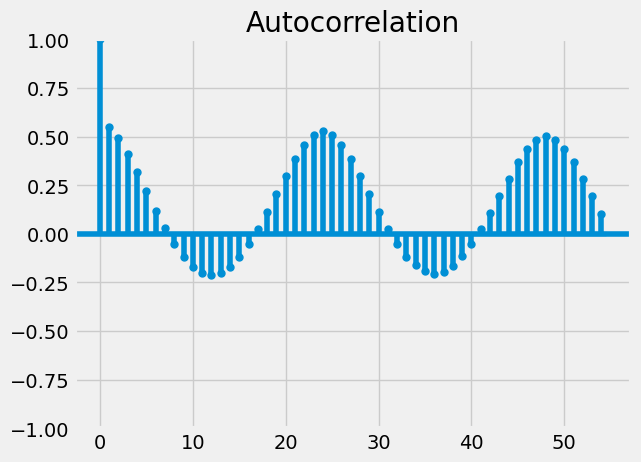

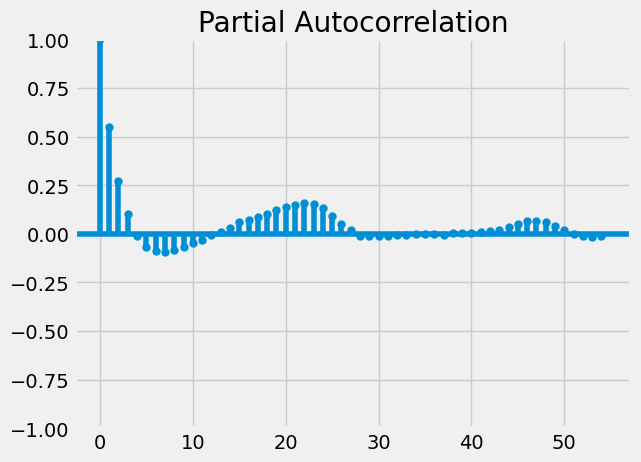

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming your DataFrame is named 'df'
# Make sure your 'Call Date' is set as the index
df1 = result.copy()
df = df1
df.set_index('index', inplace=True)
df.index.freq = "H"
# Plot the ACF and PACF to determine the order of differencing and SARIMA parameters
plot_acf(df['count'])
plot_pacf(df['count'])
#plt.show()

# Determine the seasonal order (P, D, Q, s)
#seasonal_order = (0,1,1 ,4)  # Replace P, D, Q, s with appropriate values



In [73]:
from prophet import Prophet
m = Prophet(interval_width = 0.8, daily_seasonality = True, weekly_seasonality = True)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_country_holidays(country_name='US')
p_data = train_ar[["index", "count"]]
p_data = p_data.rename(columns = {"index": "ds", "count": "y"})
m.fit(p_data)

19:18:36 - cmdstanpy - INFO - Chain [1] start processing
19:19:53 - cmdstanpy - INFO - Chain [1] done processing


## EDA

In [9]:
my_features = ["Call Number", "Unit ID", "Incident Number", "Call Type", "Call Date", "Watch Date", "Received DtTm",
               "Entry DtTm", "Dispatch DtTm", "Response DtTm", "On Scene DtTm", "Transport DtTm", "Hospital DtTm",
               "Call Final Disposition", "Available DtTm", "Address", "City", "Zipcode of Incident", "Battalion",
               "Station Area","Box", "Original Priority", "Priority", "Final Priority","ALS Unit", "Call Type Group",
               "Number of Alarms", "Unit Type", "Unit sequence in call dispatch", "Fire Prevention District", 
               "Supervisor District", "Neighborhooods - Analysis Boundaries", "RowID", "case_location", "data_loaded_at", 
               "Analysis Neighborhoods"]

fire = pd.read_csv("2022.csv")


In [13]:
fire8 = Table.from_df(fire)

In [16]:
fire8.take(0)

Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,RowID,case_location,data_loaded_at,Analysis Neighborhoods
220020135,SCRT6,22000594,Medical Incident,01/02/2022,01/01/2022,01/02/2022 01:54:19 AM,01/02/2022 01:56:50 AM,01/02/2022 01:58:45 AM,01/02/2022 01:58:45 AM,nan,nan,nan,SFPD,01/02/2022 02:11:59 AM,PINE ST/JONES ST,San Francisco,94109,B01,41,1464,1,1,2,False,Non Life-threatening,1,SUPPORT,1,1,3,Nob Hill,220020135-SCRT6,POINT (-122.41391587954833 37.790463113878246),11/30/2023 09:35:04 AM,21


In [24]:
fire8.where("Call Type", are.equal_to("Medical Incident")).group("Call Number").sort("count", descending = True)

Call Number,count
222513329,14
220932283,12
221311798,12
221931654,12
222262693,12
221890907,11
222792050,11
222850908,11
222431472,10
222982604,10


In [26]:
fire8.where("Call Number", are.equal_to(222982604))

Call Number,Unit ID,Incident Number,Call Type,Call Date,Watch Date,Received DtTm,Entry DtTm,Dispatch DtTm,Response DtTm,On Scene DtTm,Transport DtTm,Hospital DtTm,Call Final Disposition,Available DtTm,Address,City,Zipcode of Incident,Battalion,Station Area,Box,Original Priority,Priority,Final Priority,ALS Unit,Call Type Group,Number of Alarms,Unit Type,Unit sequence in call dispatch,Fire Prevention District,Supervisor District,Neighborhooods - Analysis Boundaries,RowID,case_location,data_loaded_at,Analysis Neighborhoods
222982604,B03,22138156,Medical Incident,10/25/2022,10/25/2022,10/25/2022 05:56:52 PM,10/25/2022 05:56:52 PM,10/25/2022 05:58:54 PM,10/25/2022 06:00:16 PM,nan,nan,nan,Code 2 Transport,10/25/2022 06:04:04 PM,HOWARD ST/LANGTON ST,San Francisco,94103,B03,1,2314,A,3,3,False,Potentially Life-Threatening,1,CHIEF,8,2,6,South of Market,222982604-B03,POINT (-122.40992265083071 37.77755340897342),11/30/2023 09:35:04 AM,34
222982604,E14,22138156,Medical Incident,10/25/2022,10/25/2022,10/25/2022 05:56:52 PM,10/25/2022 05:56:52 PM,10/25/2022 05:57:06 PM,nan,nan,nan,nan,Code 2 Transport,10/25/2022 05:58:25 PM,HOWARD ST/LANGTON ST,San Francisco,94103,B03,1,2314,A,3,3,True,Potentially Life-Threatening,1,ENGINE,5,2,6,South of Market,222982604-E14,POINT (-122.40992265083071 37.77755340897342),11/30/2023 09:35:04 AM,34
222982604,74,22138156,Medical Incident,10/25/2022,10/25/2022,10/25/2022 05:56:52 PM,10/25/2022 05:56:52 PM,10/25/2022 05:58:54 PM,10/25/2022 05:59:10 PM,10/25/2022 06:03:50 PM,10/25/2022 06:15:51 PM,10/25/2022 06:21:39 PM,Code 2 Transport,10/25/2022 07:15:10 PM,HOWARD ST/LANGTON ST,San Francisco,94103,B03,1,2314,A,3,3,True,Potentially Life-Threatening,1,MEDIC,2,2,6,South of Market,222982604-74,POINT (-122.40992265083071 37.77755340897342),11/30/2023 09:35:04 AM,34
222982604,93,22138156,Medical Incident,10/25/2022,10/25/2022,10/25/2022 05:56:52 PM,10/25/2022 05:56:52 PM,10/25/2022 05:57:06 PM,10/25/2022 05:57:14 PM,nan,nan,nan,Code 2 Transport,10/25/2022 05:58:25 PM,HOWARD ST/LANGTON ST,San Francisco,94103,B03,1,2314,A,3,3,True,Potentially Life-Threatening,1,MEDIC,3,2,6,South of Market,222982604-93,POINT (-122.40992265083071 37.77755340897342),11/30/2023 09:35:04 AM,34
222982604,T01,22138156,Medical Incident,10/25/2022,10/25/2022,10/25/2022 05:56:52 PM,10/25/2022 05:56:52 PM,10/25/2022 05:58:54 PM,10/25/2022 06:01:04 PM,10/25/2022 06:03:02 PM,nan,nan,Code 2 Transport,10/25/2022 06:04:04 PM,HOWARD ST/LANGTON ST,San Francisco,94103,B03,1,2314,A,3,3,False,Potentially Life-Threatening,1,TRUCK,1,2,6,South of Market,222982604-T01,POINT (-122.40992265083071 37.77755340897342),11/30/2023 09:35:04 AM,34
222982604,E01,22138156,Medical Incident,10/25/2022,10/25/2022,10/25/2022 05:56:52 PM,10/25/2022 05:56:52 PM,10/25/2022 05:58:54 PM,10/25/2022 05:59:28 PM,nan,nan,nan,Code 2 Transport,10/25/2022 06:04:04 PM,HOWARD ST/LANGTON ST,San Francisco,94103,B03,1,2314,A,3,3,True,Potentially Life-Threatening,1,ENGINE,9,2,6,South of Market,222982604-E01,POINT (-122.40992265083071 37.77755340897342),11/30/2023 09:35:04 AM,34
222982604,RC1,22138156,Medical Incident,10/25/2022,10/25/2022,10/25/2022 05:56:52 PM,10/25/2022 05:56:52 PM,10/25/2022 05:58:54 PM,10/25/2022 05:59:06 PM,nan,nan,nan,Code 2 Transport,10/25/2022 06:03:34 PM,HOWARD ST/LANGTON ST,San Francisco,94103,B03,1,2314,A,3,3,True,Potentially Life-Threatening,1,RESCUE CAPTAIN,10,2,6,South of Market,222982604-RC1,POINT (-122.40992265083071 37.77755340897342),11/30/2023 09:35:04 AM,34
222982604,T14,22138156,Medical Incident,10/25/2022,10/25/2022,10/25/2022 05:56:52 PM,10/25/2022 05:56:52 PM,10/25/2022 05:57:06 PM,10/25/2022 05:58:20 PM,nan,nan,nan,Code 2 Transport,10/25/2022 05:58:25 PM,HOWARD ST/LANGTON ST,San Francisco,94103,B03,1,2314,A,3,3,False,Potentially Life-Threatening,1,TRUCK,7,2,6,South of Market,222982604-T14,POINT (-122.40992265083071 37.77755340897342),11/30/2023 09:35:04 AM,34
222982604,B07,22138156,Medical Incident,10/25/2022,10/25/2022,10/25/2022 05:56:52 PM,10/25/202